In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [ ]:
import pandas as pd # импортируйте библиотеку pandas

In [ ]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [ ]:
data.head(20) # ваш код здесь

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [ ]:
data.info() # ваш код здесь

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [ ]:
data.isna().sum() # ваш код здесь

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [ ]:
# ваш код здесь

for income in data['income_type'].unique():
    data.loc[(data['income_type'] == income) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == income), 'total_income'].median()
    
data['total_income']

0        253875.639453
1        112080.014102
2        145885.952297
3        267628.550329
4        158616.077870
             ...      
21520    224791.862382
21521    155999.806512
21522     89672.561153
21523    244093.050500
21524     82047.418899
Name: total_income, Length: 21525, dtype: float64

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [ ]:

data['days_employed'] = data['days_employed'].abs()
data['days_employed']


0          8437.673028
1          4024.803754
2          5623.422610
3          4124.747207
4        340266.072047
             ...      
21520      4529.316663
21521    343937.404131
21522      2113.346888
21523      3112.481705
21524      1984.507589
Name: days_employed, Length: 21525, dtype: float64

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [ ]:
# ваш код здесь


data.groupby('income_type').agg({'days_employed': 'median'})


,days_employed
income_type,
безработный,366413.652744
в декрете,3296.759962
госслужащий,2689.368353
компаньон,1547.382223
пенсионер,365213.306266
предприниматель,520.848083
сотрудник,1574.202821
студент,578.751554


У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [ ]:
# ваш код здесь
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [ ]:
# ваш код здесь

data = data.drop(data[(data.children == -1) | (data.children == 20)].index)
        

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [ ]:
# ваш код здесь
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.**

In [ ]:
# ваш код здесь
for income in data['income_type'].unique():
    data.loc[(data['income_type'] == income) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == income), 'days_employed'].median()
    
data['days_employed']

0          8437.673028
1          4024.803754
2          5623.422610
3          4124.747207
4        340266.072047
             ...      
21520      4529.316663
21521    343937.404131
21522      2113.346888
21523      3112.481705
21524      1984.507589
Name: days_employed, Length: 21402, dtype: float64

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [ ]:
# ваш код здесь
data['total_income'].isna().sum()
data['days_employed'].isna().sum()

0

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [ ]:
# ваш код здесь

data['total_income'] = data['total_income'].astype('int')

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [ ]:
# ваш код 

data['education'] = data['education'].str.lower()


**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [ ]:
# посчитайте дубликаты
data.duplicated().sum()

71

In [ ]:
# удалите дубликаты
data.drop_duplicates()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля


### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [ ]:
# создайте функцию categorize_income()

def categorize_income(row):
    categorize = row['total_income']
    if categorize <= 30000:
        return 'E'
    if 30001 <= categorize <= 50000:
        return 'D'
    if 50001<= categorize <=200000:
        return 'C'
    if 200001 <= categorize <= 1000000:
        return 'B'
    return 'A'



In [ ]:
# примените функцию методом apply()
data['total_income_category'] = data.apply(categorize_income, axis=1)
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B


**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [ ]:
# ваш код здесь
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [ ]:
# создайте функцию categorize_purpose()
def categorize_purpose(row):
    categor = row['purpose']
    if 'автомоб' in categor:
        return 'операции с автомобилем'
    elif 'образов' in categor:
        return 'получение образования'
    elif 'свадьб' in categor:
        return 'проведение свадьбы'
    elif ('жиль' in categor) or ('недвиж' in categor):
        return 'операции с недвижимостью'


In [ ]:
# примените функцию методом apply()
data['purpose_category'] = data.apply(categorize_purpose, axis=1)

In [ ]:
data['purpose_category'].value_counts()

операции с недвижимостью    10780
операции с автомобилем       4288
получение образования        3997
проведение свадьбы           2337
Name: purpose_category, dtype: int64

In [ ]:
data['purpose_category'].isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21402 non-null  int64  
 1   days_employed          21402 non-null  float64
 2   dob_years              21402 non-null  int64  
 3   education              21402 non-null  object 
 4   education_id           21402 non-null  int64  
 5   family_status          21402 non-null  object 
 6   family_status_id       21402 non-null  int64  
 7   gender                 21402 non-null  object 
 8   income_type            21402 non-null  object 
 9   debt                   21402 non-null  int64  
 10  total_income           21402 non-null  int64  
 11  purpose                21402 non-null  object 
 12  total_income_category  21402 non-null  object 
 13  purpose_category       21402 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 2.4+ 

### Шаг 3. Исследуйте данные и ответьте на вопросы

## Откройте таблицу и изучите общую информацию о данных

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [ ]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

data[['children','debt']].head(10) #обратимся к столбцу 'children' и 'debt'

,children,debt
0,1,0
1,1,0
2,0,0
3,3,0
4,0,0
5,0,0
6,0,0
7,0,0
8,2,0
9,0,0


**Посчитаем количество клиентов с задолженностью и без в зависимости от количества детей.**

In [ ]:
data_pivot = data.pivot_table(index='children', columns='debt', values='income_type', aggfunc='count') #построим сводную таблицу
data_pivot

debt,0,1
children,,
0,13086.0,1063.0
1,4374.0,444.0
2,1861.0,194.0
3,303.0,27.0
4,37.0,4.0
5,9.0,NaN


**Добавим столбец общего количества клиентов по количеству детей.**
**И посчитаем отношение клиентов с задолженностями к общему количеству клиентов по количеству детей.**

In [ ]:
data_pivot = data_pivot.fillna(0) #заменим значения NaN на 0

data_pivot['count'] = data_pivot[0] + data_pivot[1] #добавляем столбец 'count' с общим количеством клиентов по количеству детей
data_pivot['ratio'] = data_pivot[1]/data_pivot['count']*100 #добавляем столбец 'ratio' с процентом клентов с задолженностями
data_pivot

debt,0,1,count,ratio
children,,,,
0,13086.0,1063.0,14149.0,7.512898
1,4374.0,444.0,4818.0,9.215442
2,1861.0,194.0,2055.0,9.440389
3,303.0,27.0,330.0,8.181818
4,37.0,4.0,41.0,9.756098
5,9.0,0.0,9.0,0.000000


**Визуализируем результаты.**

<Axes: ylabel='ratio'>

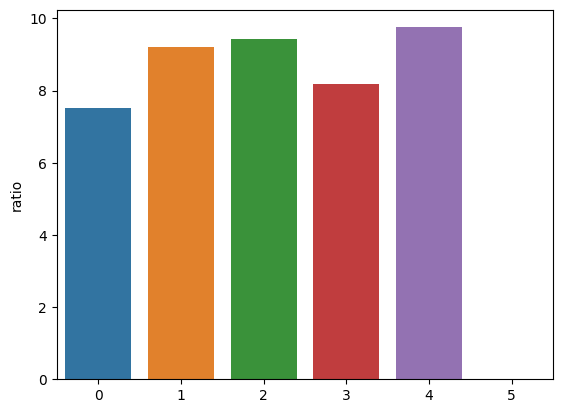

In [ ]:
import seaborn
seaborn.barplot(x=data['children'].sort_values().unique(), y=data_pivot['ratio'])

**Вывод:** 
###### Количество детей в семье критично не влияет на выплату задолженностей и разнится в несколько процентов.
###### Самый большой процент с задолженностями у клиентов с четырьмя детьми.
###### Самый маленький у клиентов без детей.
###### Клиенты с пятью детьми задолженностей не имеют, но данных недостаточно в выборке для полноценного анализа.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data[['family_status','debt']].head(10) #обратимся к столбцу 'family_status' и 'debt'

,family_status,debt
0,женат / замужем,0
1,женат / замужем,0
2,женат / замужем,0
3,женат / замужем,0
4,гражданский брак,0
5,гражданский брак,0
6,женат / замужем,0
7,женат / замужем,0
8,гражданский брак,0
9,женат / замужем,0


**Посчитаем количество клиентов с задолженностью и без в зависимости семейного статуса.**

In [ ]:
data_pivot_family = data.pivot_table(index='family_status', columns='debt', values='income_type', aggfunc='count') #построим сводную таблицу
data_pivot_family

debt,0,1
family_status,,
Не женат / не замужем,2526,273
в разводе,1105,84
вдовец / вдова,889,63
гражданский брак,3775,385
женат / замужем,11375,927


**Добавим столбец общего количества клиентов по семейному статусу.**
**И посчитаем отношение клиентов с задолженностями к общему количеству клиентов по столбцу 'family_status'.**

In [ ]:
data_pivot_family['count'] = data_pivot_family[0] + data_pivot_family[1] #добавляем стобец 'count'
data_pivot_family['ratio'] = data_pivot_family[1]/data_pivot_family['count']*100 #считаем процент задолженностей
data_pivot_family

debt,0,1,count,ratio
family_status,,,,
Не женат / не замужем,2526,273,2799,9.753483
в разводе,1105,84,1189,7.064760
вдовец / вдова,889,63,952,6.617647
гражданский брак,3775,385,4160,9.254808
женат / замужем,11375,927,12302,7.535360


**Визуализируем результаты.**

<Axes: ylabel='ratio'>

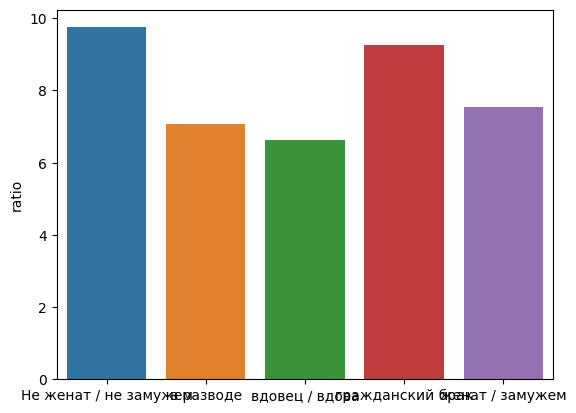

In [ ]:
seaborn.barplot(x=data['family_status'].sort_values().unique(), y=data_pivot_family['ratio'])

**Вывод:** 
###### Самый большой процент невозврата кредтов в срок среди клиентов со статусом "Не женат / не замужем" и среди тех, кто состоит в гражданском браке.
###### Клиенты с остальными статусами более ответственные.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data[['total_income','debt']].head(10) #обратимся к столбцу 'total_income' и 'debt'

,total_income,debt
0,253875,0
1,112080,0
2,145885,0
3,267628,0
4,158616,0
5,255763,0
6,240525,0
7,135823,0
8,95856,0
9,144425,0


**Диапазоны уровня доходов.**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Посчитаем количество клиентов с задолженностью и без в зависимости от уровня дохода.**

In [ ]:
data_pivot_income = data.pivot_table(index='total_income_category', columns='debt', values='income_type', aggfunc='count') #построим сводную таблицу
data_pivot_income

debt,0,1
total_income_category,,
A,23,2
B,4660,354
C,14639,1353
D,328,21
E,20,2


**Добавим столбец общего количества клиентов по цели кредита.**
**И посчитаем отношение клиентов с задолженностями к общему количеству клиентов по столбцу 'total_income_category'.
    

In [ ]:
data_pivot_income['count'] = data_pivot_income[0] + data_pivot_income[1] 
data_pivot_income['ratio'] = data_pivot_income[1]/data_pivot_income['count']*100 
data_pivot_income
    

debt,0,1,count,ratio
total_income_category,,,,
A,23,2,25,8.000000
B,4660,354,5014,7.060231
C,14639,1353,15992,8.460480
D,328,21,349,6.017192
E,20,2,22,9.090909


**Визуализируем результаты.**

<Axes: ylabel='ratio'>

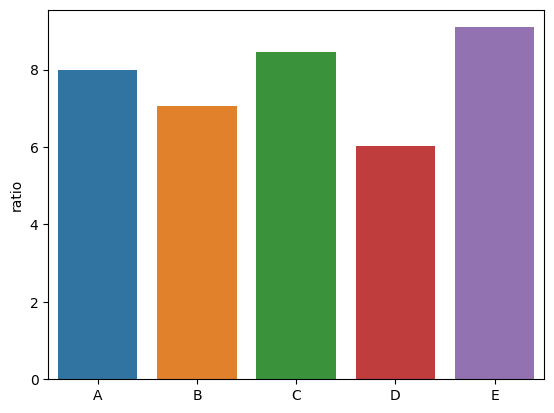

In [ ]:
seaborn.barplot(x=data['total_income_category'].sort_values().unique(), y=data_pivot_income['ratio'])

**Вывод:** 
###### Самые большие категории: С(50001–200000 руб) и В(200001–1000000 руб). Ввиду того, что в категориях А, D и Е данных недостаточно для полноценного анализа, ими можно принебречь.
 
###### В категории С результат на 1,5 % больше, чем в категории В, что является существенным. 
###### То есть при доходе до 200 000 руб клиенты имеют больше задолженностей, чем с доходом от 200 001 руб и выше.
###### Для более точных выводов нужны более равные исходные данные, только тогда результат будет более точным.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [ ]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data[['purpose_category','debt']].head(10) #обратимся к столбцу 'purpose_category' и 'debt'

,purpose_category,debt
0,операции с недвижимостью,0
1,операции с автомобилем,0
2,операции с недвижимостью,0
3,получение образования,0
4,проведение свадьбы,0
5,операции с недвижимостью,0
6,операции с недвижимостью,0
7,получение образования,0
8,проведение свадьбы,0
9,операции с недвижимостью,0


**Посчитаем общее количество клиентов с задолженность и без по цели кредита.**

In [ ]:
data_pivot_purpose = data.pivot_table(index='purpose_category', columns='debt', values='income_type', aggfunc='count') #построим сводную таблицу
data_pivot_purpose

debt,0,1
purpose_category,,
операции с автомобилем,3888,400
операции с недвижимостью,10000,780
получение образования,3628,369
проведение свадьбы,2154,183


**Добавим столбец общего количества клиентов по цели кредита.**
**И посчитаем отношение клиентов с задолженностями к общему количеству клиентов по столбцу 'purpose_category'.**

In [ ]:
data_pivot_purpose['count'] = data_pivot_purpose[0] + data_pivot_purpose[1] 
data_pivot_purpose['ratio'] = data_pivot_purpose[1]/data_pivot_purpose['count']*100 
data_pivot_purpose

debt,0,1,count,ratio
purpose_category,,,,
операции с автомобилем,3888,400,4288,9.328358
операции с недвижимостью,10000,780,10780,7.235622
получение образования,3628,369,3997,9.231924
проведение свадьбы,2154,183,2337,7.830552


**Визуализируем данные.**

<Axes: ylabel='ratio'>

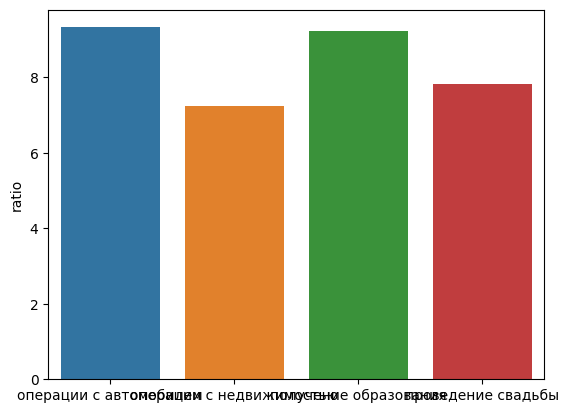

In [ ]:
seaborn.barplot(x=data['purpose_category'].sort_values().unique(), y=data_pivot_purpose['ratio'])

**Вывод:** 
###### Самая большая доля задолженностей у клиентов с целью "операции с автомобилем" и "получение образования".
###### Самая минимальная доля задолженностей у клиентов с целью "операции с недвижимостью".


#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
пропуски в исходных данных могут возникнуть из-за технического  сбоя, так и из-за человеческого фактора.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* на результат среднего значения могут повлиять значения с большими выбросами, чего можно избежать, посчитав медианное значение и заполнив им пропуски.

### Шаг 4: общий вывод.

###### Риски невозврата задолженностей имеют клиенты:
* с большим количеством детей (от трёх и более)
* не имеющие опыта в совместном ведении хозяйства или ведения семейного бюджета
* доходом до 200 000 руб.
* с целью кредита "покупка авто"

###### Наименьшие риски невозврата задолженностей имеют клиенты:
* не имеющие детей
* имеющие опыт семейных отношений (в разводе/вдовцы), но проживающие одни
* с доходом от 200 001 руб.
* с целью кредита "покупка недвижимости"

###### Исходя из анализа данных можно сделать вывод, что одинокие клиенты с опытом отношений, не имеющие детей, со средним доходом, целью которых является покупка недвижимости, предположительно являются самыми надёжными из представленных данных. 
###### В тоже время, допускаю искажение результатов ввиду того, что в крайние значения выборки попадает недостаточно данных и возможна погрешность в рассчетах. Для более точного исследования исходные данные должны допустимо количественно совпадать.